# Importing Modules

In [1]:
#basic
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#sklearn 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier

#Other
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Data Exploration

## Importing Data

In [2]:
df = pd.read_csv('raw_data/train.csv')

In [3]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
df.set_index('id', inplace=True)

## Duplicates & Null Values

In [5]:
len(df) # Check number of rows before removing duplicates - no duplicates

300000

In [6]:
df.isnull().sum().sort_values(ascending=False) #NaN count for each column

cat0      0
cat16     0
cont10    0
cont9     0
cont8     0
cont7     0
cont6     0
cont5     0
cont4     0
cont3     0
cont2     0
cont1     0
cont0     0
cat18     0
cat17     0
cat15     0
cat1      0
cat14     0
cat13     0
cat12     0
cat11     0
cat10     0
cat9      0
cat8      0
cat7      0
cat6      0
cat5      0
cat4      0
cat3      0
cat2      0
target    0
dtype: int64

## Categorical & Numerical Columns

In [7]:
cat_cols = list(df.select_dtypes(exclude=['float64', 'int64']).columns)
num_cols = list(df.select_dtypes(include=['float64', 'int64']).columns)
print(f"categorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")

categorical Columns: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18']
Numerical Columns: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target']


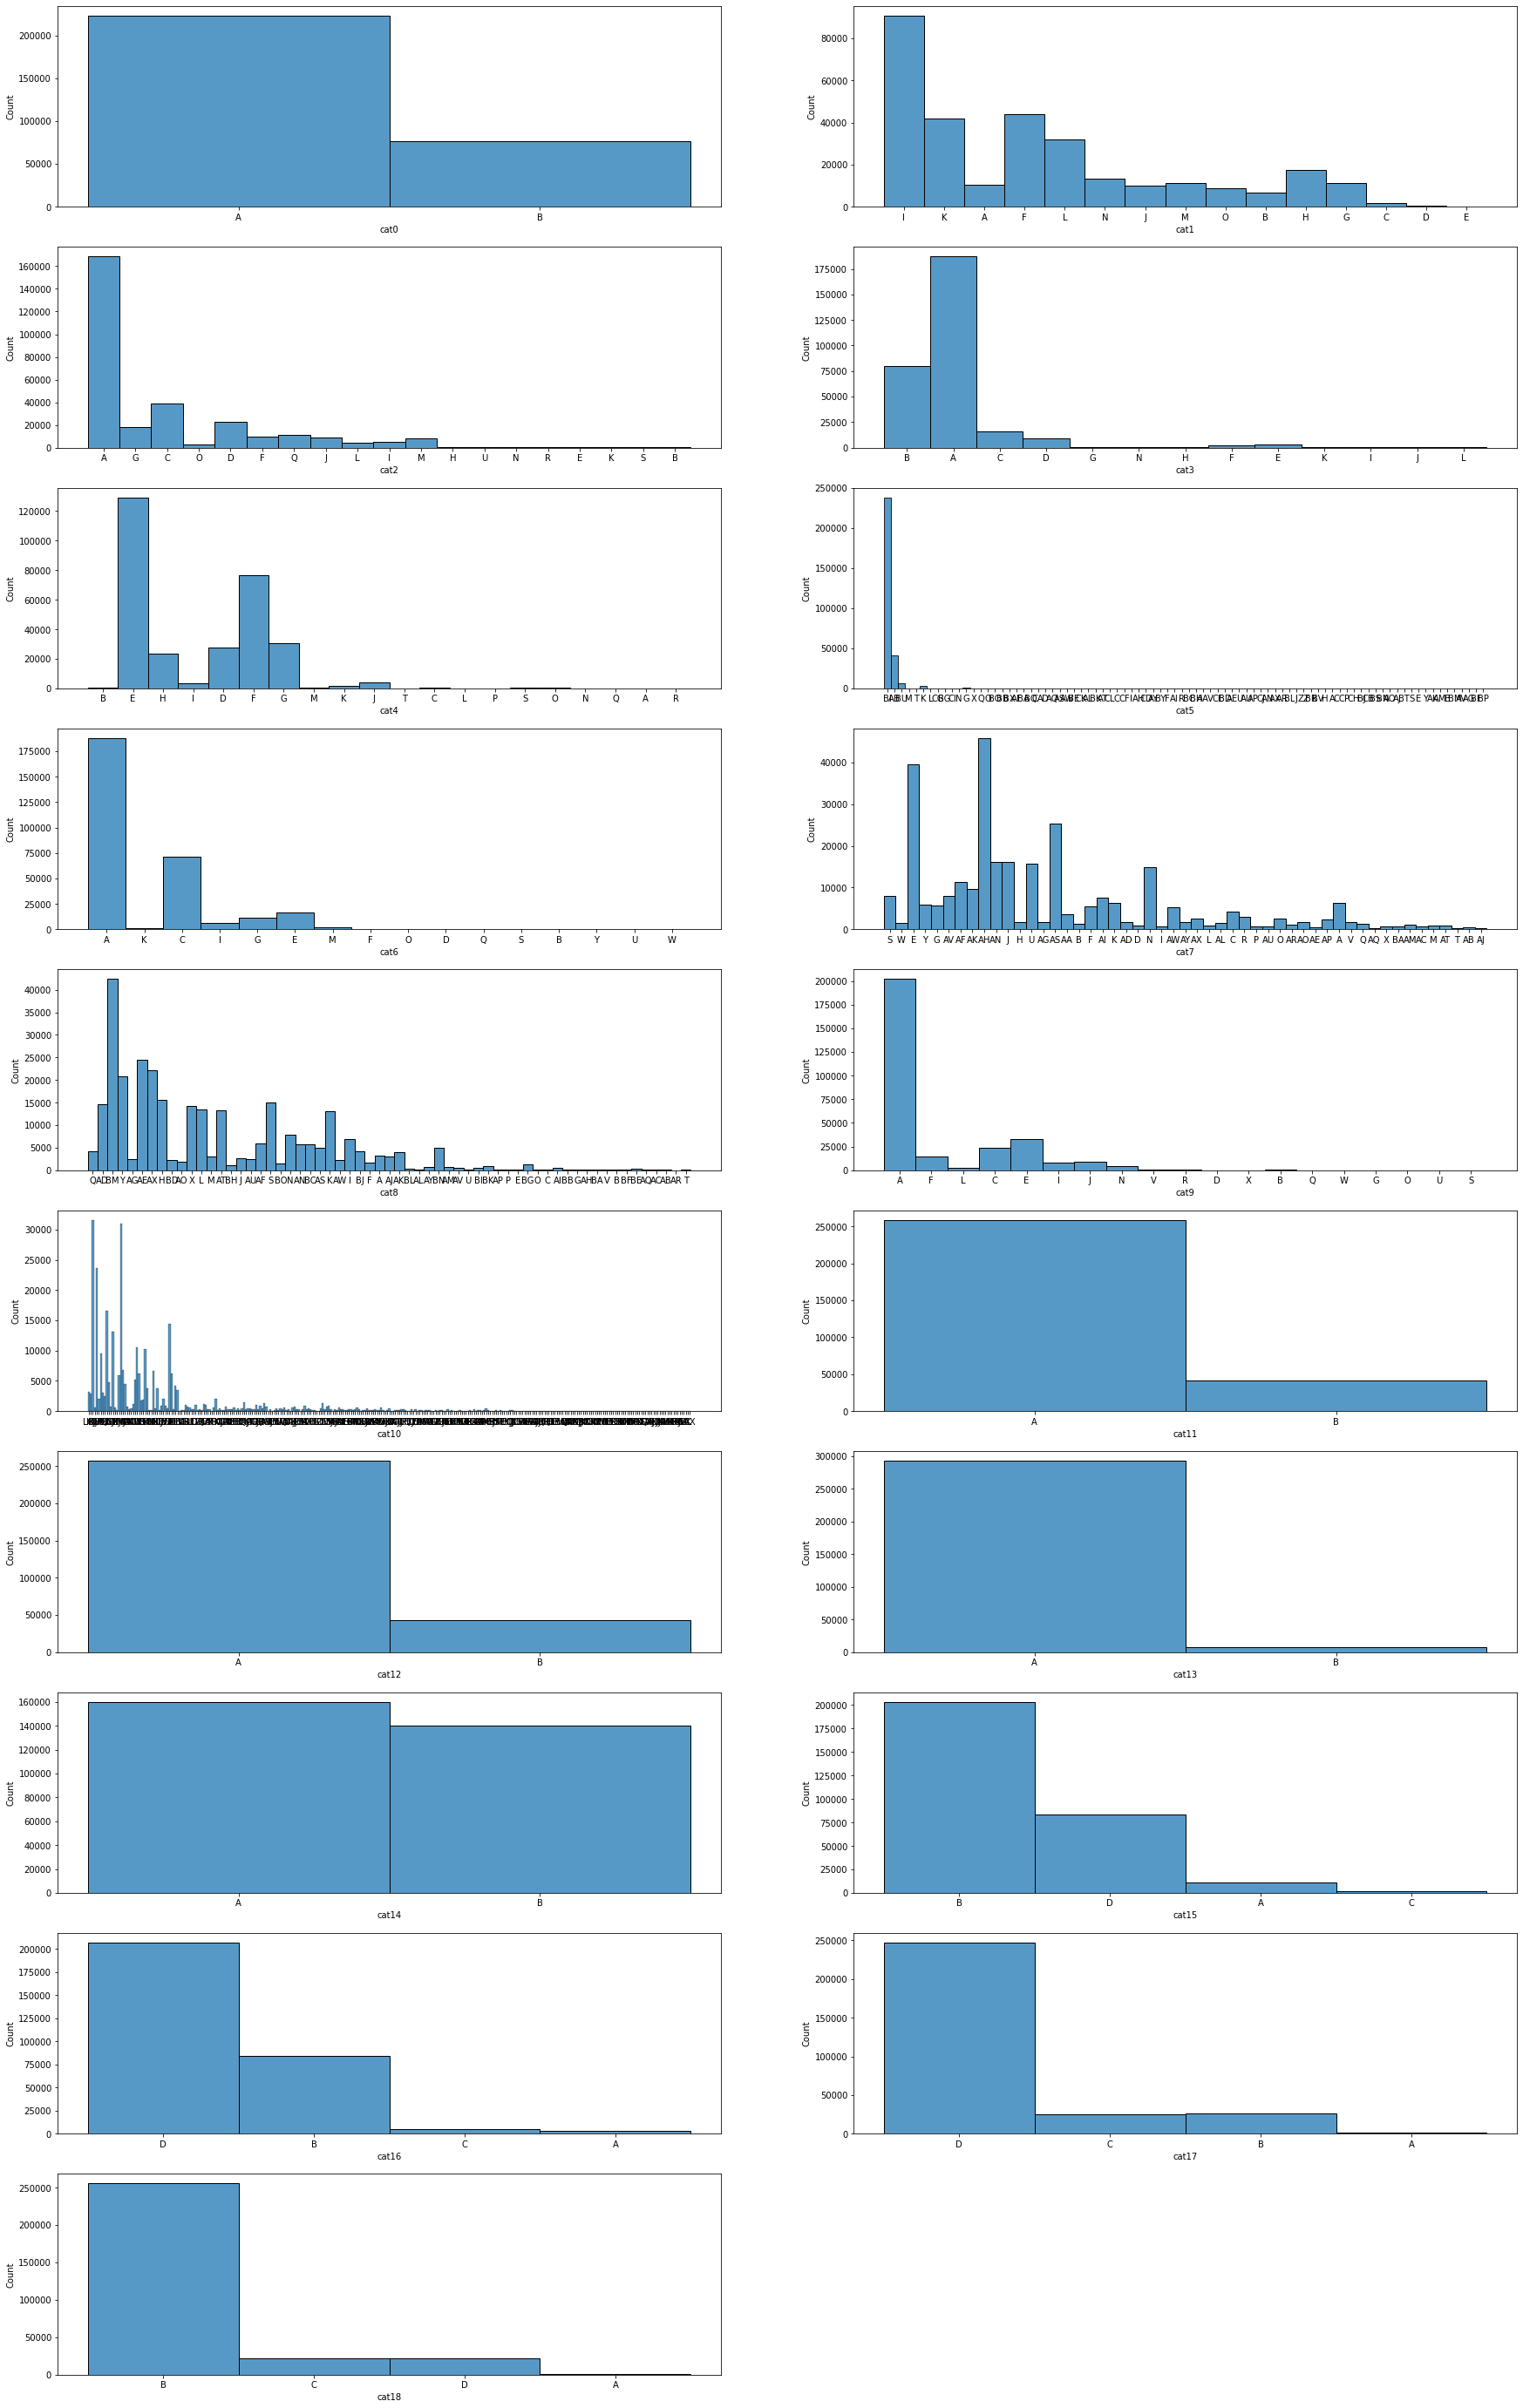

In [8]:
plt.figure(figsize=(30,50))
for index, cat in enumerate(cat_cols):
    index += 1
    plt.subplot(10,2,index)
    x = df[cat]
    sns.histplot(x)

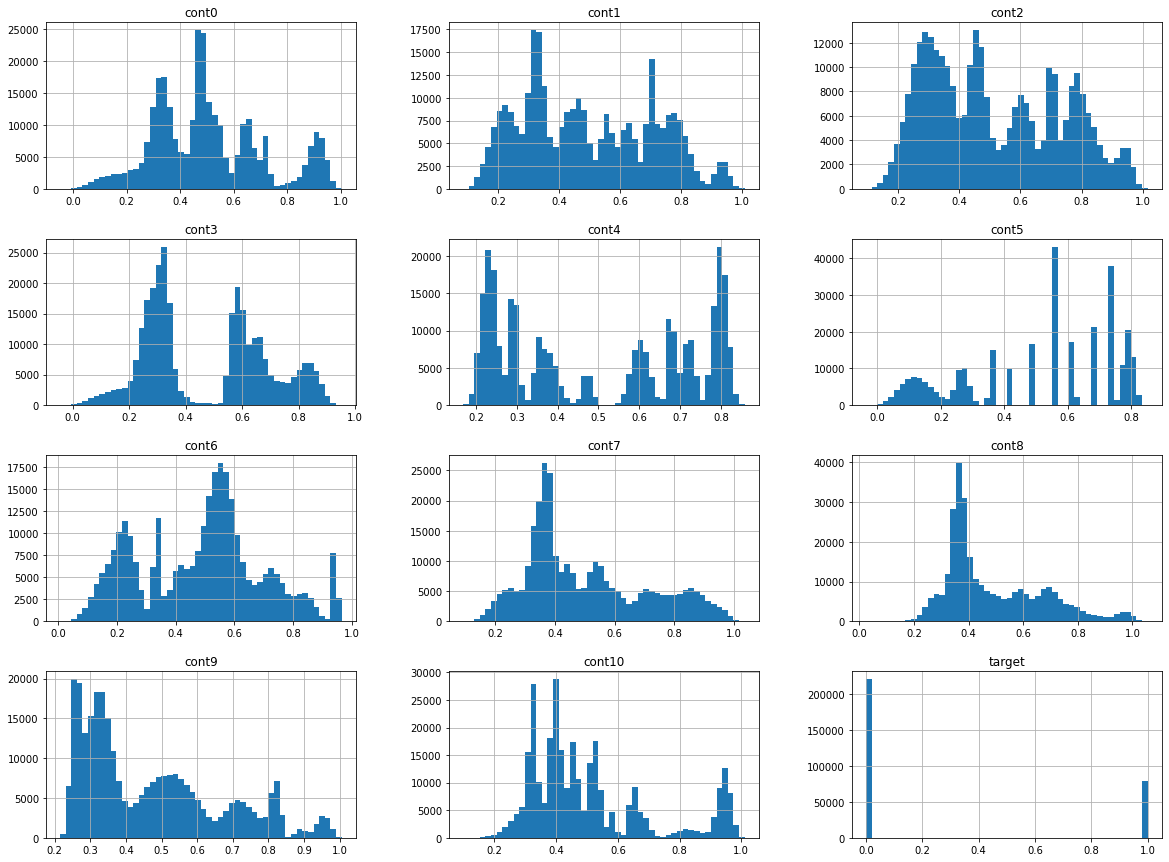

In [9]:
### Numerical Features
df.hist(bins=50, figsize=(20,15))
plt.show()

## Target Balance

<AxesSubplot:xlabel='target', ylabel='Count'>

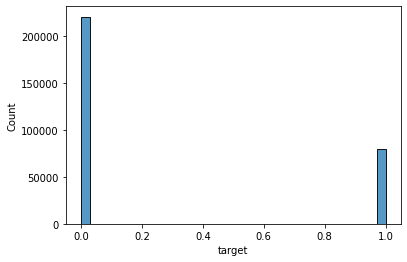

In [10]:
sns.histplot(df['target']) #imbalanced, so i shouldnt use accuracy[[TN,FP], [FN,TP]], F1 identifies 1, & w/o wrong ones

## Correlation Matrix

<AxesSubplot:>

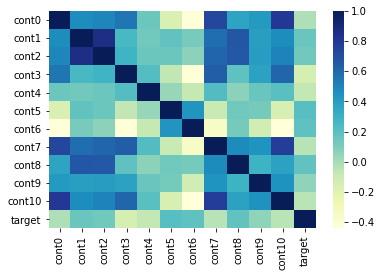

In [11]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

# Feature Selection

## Dropping numerical features

In [12]:
#df_no_corr = df.drop(columns = ['cont2','cont7','cont10'])

In [13]:
#df_no_corr.shape

In [14]:
#new_num_cols = df_no_corr._get_numeric_data().columns
#new_num_cols

## Changing long tails for categorical features

In [15]:
# def value_rem(df=df, cat_cols=cat_cols, q=.8):
#     for column in cat_cols:
#         ## creating dict of value counts for each feature
#         print(column)
#         d_ = df[column].value_counts()
# #         print(f"Selected quantile: {d_.quantile(q=q)}")
#         for k, v in dict(d_).items():
# #             print(f"value: {k}, count: {v}")
#             if v < d_.quantile(q=q):
#                 df[column] = df[column].replace(k, "other")
# #                 print(f"replaced value: {k}")
#     return df

In [16]:
# df_red = value_rem(df=df_no_corr)

In [17]:
#df_red

# Data Preprocessing

## Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
X = df.drop(columns = 'target')
y = df.target

In [20]:
# # Encoder Categorical Data
# for c in X.columns:
#     lbl = LabelEncoder()
#     if X[c].dtype=='object': 
#         print(c, X[c].unique().tolist())
#         lbl.fit(X[c].unique().tolist())
#         X[c] = lbl.transform(X[c])

## One Hot Encoding

In [21]:
X = df.drop(columns = 'target')
y = df.target

In [22]:
### OneHotEncoder for cat vals // ordinal encoding does not apply since the vlaue of the cats is unknown
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [23]:
preprocessor = ColumnTransformer([('cat_transformer', cat_transformer, cat_cols)], remainder="passthrough")

In [24]:
X = preprocessor.fit_transform(X)

In [25]:
# ## to inspect the encoded df we need to get the generated column names
columns = preprocessor.get_feature_names()
len(columns)

634

In [26]:
X = pd.DataFrame(X.toarray(), columns=columns)

In [27]:
X.shape

(300000, 634)

## SMOTE Balancing

In [28]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [29]:
X_resampled.shape
## there are 98 634 more rows in the resampled train data

(441078, 634)

In [74]:
X_resampled.join(y_resampled)

,cat_transformer__x0_A,cat_transformer__x0_B,cat_transformer__x1_A,cat_transformer__x1_B,cat_transformer__x1_C,cat_transformer__x1_D,cat_transformer__x1_E,cat_transformer__x1_F,cat_transformer__x1_G,cat_transformer__x1_H,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441073,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232442,0.0,0.767558,...,0.287950,0.600446,0.797126,0.695854,0.566418,0.272594,0.385536,0.459037,0.371045,1
441074,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.579621,0.792986,0.725086,0.212949,0.232171,0.891910,0.702162,0.567451,0.896829,1
441075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.151153,0.321981,0.238893,0.680356,0.543227,0.295242,0.264107,0.268845,0.303570,1
441076,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.793074,0.246293,0.216769,0.776622,0.815340,0.385442,0.663515,0.580435,0.515950,1


# Modelling

## Train & Test Split

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=1)

## Baseline Model

In [31]:
log = LogisticRegression(max_iter=1000)

In [32]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
def predict_proba(X_val, y_val):
    y_pred = log.predict_proba(X_val)[:, 1] # This grabs the positive class prediction
    score = roc_auc_score(y_val, y_pred)
    return score

In [34]:
score = predict_proba(X_val, y_val)
score

0.8840675989140273

## Baseline Model with SMOTE

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=.3, random_state=1)

In [36]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
score = predict_proba(X_val, y_val)
score

0.8854554818146729

## Feature Permutation

In [38]:
from sklearn.inspection import permutation_importance

log_model = log.fit(X_train, y_train) # Fit model

permutation_score = permutation_importance(log_model, X_train, y_train, n_repeats=50) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
614,cat_transformer__x16_D,0.006194
628,cont5,0.006053
612,cat_transformer__x16_B,0.004548
605,cat_transformer__x14_A,0.004323
102,cat_transformer__x5_BI,0.003632
...,...,...
215,cat_transformer__x7_U,-0.000048
201,cat_transformer__x7_G,-0.000051
56,cat_transformer__x4_H,-0.000055
318,cat_transformer__x10_AV,-0.000061


In [39]:
feat_keep = importance_df[importance_df['score decrease']>0].feature
feat_keep

0      cat_transformer__x0_A
1      cat_transformer__x0_B
2      cat_transformer__x1_A
3      cat_transformer__x1_B
4      cat_transformer__x1_C
               ...          
629                    cont6
630                    cont7
631                    cont8
632                    cont9
633                   cont10
Name: feature, Length: 434, dtype: object

## Exporting new data to CSV

In [79]:
final_data = X_resampled[feat_keep].join(y_resampled)

In [80]:
final_data

,cat_transformer__x0_A,cat_transformer__x0_B,cat_transformer__x1_A,cat_transformer__x1_B,cat_transformer__x1_C,cat_transformer__x1_F,cat_transformer__x1_G,cat_transformer__x1_I,cat_transformer__x1_J,cat_transformer__x1_K,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441073,1.0,0.0,0.0,0.0,0.0,0.232442,0.0,0.0,0.0,0.0,...,0.287950,0.600446,0.797126,0.695854,0.566418,0.272594,0.385536,0.459037,0.371045,1
441074,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.579621,0.792986,0.725086,0.212949,0.232171,0.891910,0.702162,0.567451,0.896829,1
441075,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.151153,0.321981,0.238893,0.680356,0.543227,0.295242,0.264107,0.268845,0.303570,1
441076,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.793074,0.246293,0.216769,0.776622,0.815340,0.385442,0.663515,0.580435,0.515950,1


In [81]:
final_data.to_csv('Data_March_Treated.csv')

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled[feat_keep], y_resampled, test_size=.3, random_state=1)

In [41]:
X_val

,cat_transformer__x0_A,cat_transformer__x0_B,cat_transformer__x1_A,cat_transformer__x1_B,cat_transformer__x1_C,cat_transformer__x1_F,cat_transformer__x1_G,cat_transformer__x1_I,cat_transformer__x1_J,cat_transformer__x1_K,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
14272,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,...,0.759745,0.802656,0.291339,0.303853,0.131722,0.389936,0.861615,0.375944,0.309905,0.847446
196350,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.479891,0.444910,0.387853,0.285263,0.806833,0.722420,0.323233,0.576045,0.342115,0.409506
12580,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,...,0.463287,0.441202,0.651419,0.622047,0.181163,0.182087,0.673344,0.404213,0.424719,0.634186
388153,1.0,0.0,0.0,0.0,0.0,0.652054,0.0,0.347946,0.000000,0.0,...,0.669933,0.697440,0.542311,0.738291,0.792345,0.641598,0.553142,0.523379,0.299032,0.506013
421941,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,...,0.643429,0.639782,0.262101,0.779337,0.568775,0.616595,0.554370,0.844865,0.253911,0.408073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202615,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.752400,0.832276,0.037547,0.803224,0.553753,0.329064,0.757331,0.534106,0.708734,0.907396
147747,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,...,0.490242,0.625979,0.572625,0.482695,0.003158,0.104739,0.888760,0.618821,0.870323,0.939967
334990,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.758461,0.0,...,0.358539,0.335247,0.325155,0.256987,0.797899,0.574849,0.376691,0.381351,0.433945,0.460110
62995,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,...,0.591496,0.533550,0.726442,0.388959,0.158581,0.222123,0.733533,0.686987,0.327736,0.946782


In [42]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
score = predict_proba(X_val, y_val)
score

0.8851477849358682

# Further Modelling

## XGBClassifier

In [44]:
xgb = XGBClassifier(random_state=1, learning_rate=0.01)
cv_results=cross_validate(xgb, X_train, y_train, scoring = 'f1', cv=3) 
cv_results['test_score'].mean()

/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:16:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:20:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8130873607485177

In [67]:
xgb.fit(X_train,y_train)

[22:43:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
def predict_proba_xgb(X_val, y_val):
    y_pred = xgb.predict_proba(X_val)[:, 1] # This grabs the positive class prediction
    score = roc_auc_score(y_val, y_pred)
    return score

In [69]:
score = predict_proba_xgb(X_val, y_val)
score

0.8987673985953589

## SGDClassifier

In [47]:
sgd = SGDClassifier()

In [48]:
cv_results = cross_validate(sgd, X_train, y_train, scoring = 'f1', cv=5)
cv_results['test_score'].mean()

0.7931868324661471

In [70]:
sgd.fit(X_train,y_train)

SGDClassifier()

In [71]:
def predict_proba_sgd(X_val, y_val):
    y_pred = sgd.predict_proba(X_val)[:, 1] # This grabs the positive class prediction
    score = roc_auc_score(y_val, y_pred)
    return score

In [72]:
score = predict_proba_sgd(X_val, y_val)
score

AttributeError: probability estimates are not available for loss='hinge'

# Fine Tuning Model

# SUBMISSION

In [51]:
X_test = pd.read_csv('raw_data/test.csv')

In [52]:
X_test.set_index('id', inplace=True)

In [53]:
X_test = preprocessor.transform(X_test)

In [54]:
X_test.shape

(200000, 634)

In [55]:
X_test

<200000x634 sparse matrix of type '<class 'numpy.float64'>'
	with 5999990 stored elements in Compressed Sparse Row format>

In [56]:
list_col = X_train.columns.tolist()

In [57]:
X_test = pd.DataFrame(X_test.toarray(), columns=columns)

In [58]:
X_test = X_test[list_col]

In [59]:
submission_data = pd.read_csv('sample_submission.csv', index_col='id')

In [60]:
model = XGBClassifier(n_estimators = 200, learning_rate = 0.01, early_stop = 5)

In [61]:
model.fit(X_train,y_train)

/home/sisto/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:25:03] WARNING: ../src/learner.cc:541: 
Parameters: { early_stop } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:25:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stop=5, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
submission_data['target'] = model.predict_proba(X_test)[:, 1]
submission_data.to_csv('XGBClassifier_v1.csv')

submission_data.head()

,target
id,
5,0.266100
6,0.772234
8,0.199267
9,0.255335
11,0.298748
